
<h1 align="center"><font size="5">Rainfall Prediction</font></h1>


<h2>Table of Contents</h2>
<div style="margin-top: 20px">
    <ul>
    <li>In this notebook</li>
    <li>About the Data</li>
    <li>Importing Data </li>
    <li>Data Preprocessing </li>
    <li>One Hot Encoding </li>
    <li>Train and Test Data Split </li>
    <li>Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models. Returning their appropriate accuracy scores</li>
</li>


<hr>


# In this notebook


Classification algorithms:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

Evaluation metrics:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Report generation with the use of the different models and metrics. 


# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Importing the required libraries**


In [ ]:
# Create an environment with Python >=3.7 & <=3.11 for library compatibility
# conda create -n basicMachineLearning python=3.7
# conda install -n basicMachineLearning ipykernel --update-deps --force-reinstall

# Libraries required.
# pip install pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1 


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [26]:
import csv
from urllib import request

async def download(url, filename):
    response = request.urlopen(url)
    encoding = response.headers.get_content_charset('utf-8')
    if response.status == 200:
        with open(filename, "w") as f:
            f.write(response.read().decode(encoding))


In [4]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [27]:
await download(url, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [28]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


To convert categorical variables to binary variables.


In [29]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Replacing the values of the 'RainTomorrow' column from categorical to binary data. Not using the `get_dummies` method because the table would end up with two columns for 'RainTomorrow', which is the target variable.


In [30]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Getting 'features' and the target variable (Y).


In [31]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [32]:
df_sydney_processed = df_sydney_processed.astype(float)

In [114]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


In [115]:

x_train, x_test, y_train, y_test = train_test_split( features, Y, test_size=0.2, random_state=10)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


In [116]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression().fit(x_train, y_train)

In [117]:
from sklearn.metrics import r2_score

predictions = LinearReg.predict(x_test)
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test) ** 2)
LinearRegression_R2 = r2_score(predictions, y_test)
print('MAE: ', LinearRegression_MAE)
print('MSE: ', LinearRegression_MSE)
print('R2 Score: ', LinearRegression_R2)

MAE:  0.25632199585892773
MSE:  0.11572197779926661
R2 Score:  -0.3847394238449513


In [118]:
# creating a DataFrame
dict = {'model': 'linear regression',
         'MAE' : LinearRegression_MAE,
         'MSE' : LinearRegression_MSE,
          'R2' : LinearRegression_R2}
Report = pd.DataFrame(dict, index=[0]).set_index('model')
 
# displaying the DataFrame
display(Report)

,MAE,MSE,R2
model,,,
linear regression,0.256322,0.115722,-0.384739


### KNN

Using **StandardScaler()** to normalize the dataset. Data Standardization gives the data zero mean and unit variance. It is good practice, especially for algorithms such as KNN which is based on the distance of data points.

In [119]:
from sklearn.preprocessing import StandardScaler

x_train_stdNorm = StandardScaler().fit(x_train).transform(x_train.astype(float))
x_test_stdNorm = StandardScaler().fit(x_test).transform(x_test.astype(float))

In [120]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
KNN = KNeighborsClassifier(n_neighbors = k).fit(x_train_stdNorm, y_train)

In [121]:
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

predictions = KNN.predict(x_test_stdNorm)
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)
print('Accuracy: ',KNN_Accuracy_Score)
print('Jaccard Index: ',KNN_JaccardIndex)
print('F1 Score: ',KNN_F1_Score)

Accuracy:  0.7648854961832061
Jaccard Index:  0.24509803921568626
F1 Score:  0.3937007874015748


### Decision Tree


In [122]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

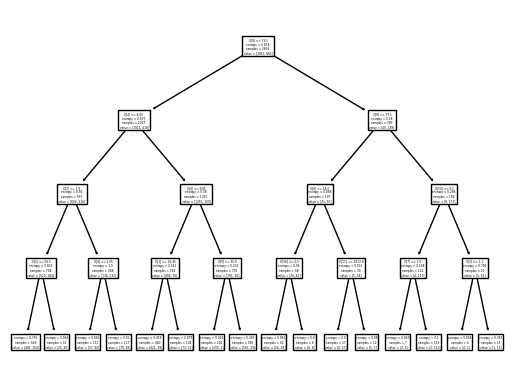

In [123]:
Tree.fit(x_train,y_train)
tree.plot_tree(Tree)
plt.show()

In [124]:
predictions = Tree.predict(x_test)

Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

print('Tree Accuracy: ',Tree_Accuracy_Score)
print('Tree Jaccard Index: ',Tree_JaccardIndex)
print('Tree F1 Score: ',Tree_F1_Score)

Tree Accuracy:  0.8183206106870229
Tree Jaccard Index:  0.48034934497816595
Tree F1 Score:  0.6489675516224188


### Logistic Regression

We use the normalized data after being processed with **StandardScaler()**

In [125]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_stdNorm,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [126]:
predictions = LR.predict(x_test_stdNorm)
predict_proba = LR.predict_proba(x_test_stdNorm)

In [127]:
from sklearn.metrics import log_loss

LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_JaccardIndex = jaccard_score(y_test, predictions,pos_label=0)
LR_F1_Score = f1_score(y_test, predictions)
LR_Log_Loss = log_loss(y_test, predict_proba)

print('LR Accuracy: ',LR_Accuracy_Score)
print('LR Jaccard Index: ',LR_JaccardIndex)
print('LR F1 Score: ',LR_F1_Score)
print('LR Log Loss: ',LR_Log_Loss)

LR Accuracy:  0.8412213740458016
LR Jaccard Index:  0.8070500927643784
LR F1 Score:  0.6904761904761905
LR Log Loss:  0.3727427817955501


### SVM


In [128]:
SVM = svm.SVC(kernel='rbf').fit(x_train_stdNorm, y_train) 

In [129]:
predictions = SVM.predict(x_test_stdNorm)

In [130]:
SVM_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
SVM_JaccardIndex = jaccard_score(y_test, predictions,pos_label=0)
SVM_F1_Score = f1_score(y_test, predictions, average='weighted') 

print('SVM Accuracy: ',SVM_Accuracy_Score)
print('SVM Jaccard Index: ',SVM_JaccardIndex)
print('SVM F1 Score: ',SVM_F1_Score)

SVM Accuracy:  0.8351145038167939
SVM Jaccard Index:  0.8067978533094812
SVM F1 Score:  0.8219780817776434


### Report


In [131]:
# creating a DataFrame
dict2 = {'model'        : ['KNN', 'Tree', 'LR', 'SVM'],
        'Accuracy'      : [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score,SVM_Accuracy_Score],
        'Jaccard Index' : [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex,SVM_JaccardIndex],
        'F1-Score'      : [KNN_F1_Score, Tree_F1_Score, LR_F1_Score,SVM_F1_Score],
        'LogLoss'       : [0, 0, LR_Log_Loss, 0]}
Report2 = pd.DataFrame(dict2).set_index('model')
 
# displaying the DataFrame
display(Report2)

,Accuracy,Jaccard Index,F1-Score,LogLoss
model,,,,
KNN,0.764885,0.245098,0.393701,0.000000
Tree,0.818321,0.480349,0.648968,0.000000
LR,0.841221,0.807050,0.690476,0.372743
SVM,0.835115,0.806798,0.821978,0.000000
